<a href="https://colab.research.google.com/github/tikendraw/NLP/blob/main/nltk__stemming_lemmatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

import os
# os.chdir('controotent')

# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:

# nltk.download(download_dir='/content/sample_data/nltkdata') # enter d then all as identifier

In [3]:
story = '''While at a motel in North Dakota, I went to breakfast and sat by a gentleman who was on the phone.
 I overheard him say that he had “lost time yesterday” because his “passengers got cranky” so he “stopped at a 
 truck stop and hosed them down with cold water.” Then I noticed a school bus in front of the motel that hadn’t been there 
 the day before. When the gentleman ended his call, I asked him if that was  
his bus. “No,” he replied. “I’m in the back with a semi load of pigs.”'''

In [4]:
sentence = nltk.sent_tokenize(story)

In [5]:
sentence

['While at a motel in North Dakota, I went to breakfast and sat by a gentleman who was on the phone.',
 'I overheard him say that he had “lost time yesterday” because his “passengers got cranky” so he “stopped at a \n truck stop and hosed them down with cold water.” Then I noticed a school bus in front of the motel that hadn’t been there \n the day before.',
 'When the gentleman ended his call, I asked him if that was  \nhis bus.',
 '“No,” he replied.',
 '“I’m in the back with a semi load of pigs.”']

In [6]:
len(sentence)

5

In [7]:
word = nltk.word_tokenize(story)

In [8]:
word[:10],len(word)

(['While', 'at', 'a', 'motel', 'in', 'North', 'Dakota', ',', 'I', 'went'], 117)

# Stemming

$ **Stemming** usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.

history, historical --> histori

gone, go, going --> go

* It creates word which is the stem of words like 'go' which is  present in 'gone', 'go' and 'going'.

* It is not always meaningful. i.e. 'history' and 'historical' are changed to ' histori' , which is a meaningless word.

* It is faster than **Lemmatization** , as it does not have to look for meaning.

## Stopword

* Stop word  are word that show any sentiment like: is,the, to , there, not etc.

* Since it does not tell anything much about the data and takes alot of space, we just like to remove it.

In [9]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer()

In [10]:
sentence_new = []
for i in range(len(sentence)):
  words= nltk.word_tokenize(sentence[i])
  ##stemming
  word_new = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
  sentence_new.append(' '.join(word_new))

In [11]:
sentence

['While at a motel in North Dakota, I went to breakfast and sat by a gentleman who was on the phone.',
 'I overheard him say that he had “lost time yesterday” because his “passengers got cranky” so he “stopped at a \n truck stop and hosed them down with cold water.” Then I noticed a school bus in front of the motel that hadn’t been there \n the day before.',
 'When the gentleman ended his call, I asked him if that was  \nhis bus.',
 '“No,” he replied.',
 '“I’m in the back with a semi load of pigs.”']

In [12]:
sentence_new

['while motel north dakota , I went breakfast sat gentleman phone .',
 'I overheard say “ lost time yesterday ” “ passeng got cranki ” “ stop truck stop hose cold water. ” then I notic school bu front motel ’ day .',
 'when gentleman end call , I ask bu .',
 '“ No , ” repli .',
 '“ I ’ back semi load pig . ”']

# Lemmatization

$ ***Lemmatization*** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . 

* Gives meaningfull words

* Comparitively slower

In [14]:
from nltk.stem import WordNetLemmatizer

In [15]:
sentence2 = nltk.sent_tokenize(story)
len(sentence2)

5

In [16]:
lemmatizer = WordNetLemmatizer()

In [19]:
%%debug
## lets lemmatize
sentence2_new = []
for i in range(len(sentence2)):
  words = nltk.word_tokenize(sentence2[i])
  words = [lemmatizer.lemmatize(word) for word in words if  word not in set(stopwords.words('english'))]
  sentence2_new.append([' '.join(words)])

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(3)<module>()

ipdb> c


### See the differece betweenn lemmatization and stemming on the same data

In [20]:
sentence2_new

[['While motel North Dakota , I went breakfast sat gentleman phone .'],
 ['I overheard say “ lost time yesterday ” “ passenger got cranky ” “ stopped truck stop hosed cold water. ” Then I noticed school bus front motel ’ day .'],
 ['When gentleman ended call , I asked bus .'],
 ['“ No , ” replied .'],
 ['“ I ’ back semi load pig . ”']]

In [22]:
[sentence_new]

[['while motel north dakota , I went breakfast sat gentleman phone .',
  'I overheard say “ lost time yesterday ” “ passeng got cranki ” “ stop truck stop hose cold water. ” then I notic school bu front motel ’ day .',
  'when gentleman end call , I ask bu .',
  '“ No , ” repli .',
  '“ I ’ back semi load pig . ”']]

## Difference

* Left (lemmatized) , right (stemmed)*italicised text*



---

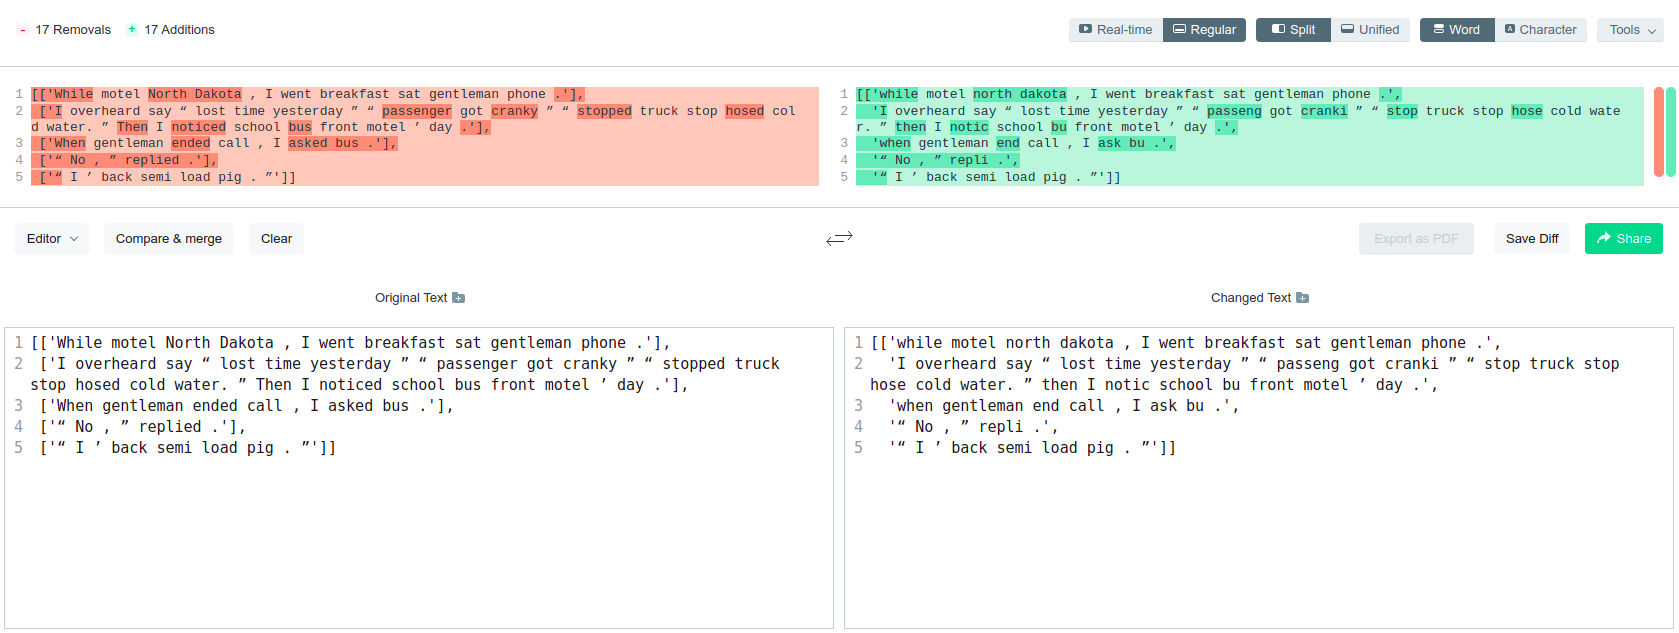

# Bag of Words

 *A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:



1.   A vocabulary of known words.
2.   A measure of the presence of known words.




*It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

*A very common feature extraction procedures for sentences and documents is the bag-of-words approach (BOW). In this approach, we look at the histogram of the words within the text, i.e. considering each word count as a feature.

In [23]:
story2 = '''Penny was a little girl who lived in Alaska. It was ice-cold there. She kept praying that she could play in the lush, green and warm gardens like we do but of course, she couldn't. 

Her father, like all the men there, didn't have a job. He hunted seals and caught fishes as was the custom. So her father hadn't even heard of money and even if he had money, there weren't any aeroplanes to take them abroad. 

Now somewhere near Penny's house was a deep, dark forest. Everyone was afraid to enter it. They said that whoever entered it would be sucked in by a great hole. 

One day, Penny was playing with her Eskimo friends when one of the boys shouted, "Hey, I dare one of you to enter the magic forest." 

No one dared. Penny picked up a twig and threw it at the edge of the forest. Nothing happened. Penny was astonished. It's all a legend! We can play hide and seek in the woods if we want, she thought. She walked slowly towards the woods. It was getting colder and colder she took each step. She walked right into the middle of the forest. '''

* we have to :

  1. Clean data from anything other than alphabets 
  2. Lower the cases

## Create BOW from stemming

In [25]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import regex as re

In [27]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [28]:
# to sentences
storylines  = nltk.sent_tokenize(story2)

In [29]:
storylines

['Penny was a little girl who lived in Alaska.',
 'It was ice-cold there.',
 "She kept praying that she could play in the lush, green and warm gardens like we do but of course, she couldn't.",
 "Her father, like all the men there, didn't have a job.",
 'He hunted seals and caught fishes as was the custom.',
 "So her father hadn't even heard of money and even if he had money, there weren't any aeroplanes to take them abroad.",
 "Now somewhere near Penny's house was a deep, dark forest.",
 'Everyone was afraid to enter it.',
 'They said that whoever entered it would be sucked in by a great hole.',
 'One day, Penny was playing with her Eskimo friends when one of the boys shouted, "Hey, I dare one of you to enter the magic forest."',
 'No one dared.',
 'Penny picked up a twig and threw it at the edge of the forest.',
 'Nothing happened.',
 'Penny was astonished.',
 "It's all a legend!",
 'We can play hide and seek in the woods if we want, she thought.',
 'She walked slowly towards the wood

In [78]:
stemmed_bow = []
for i in range(len(storylines)):
  line = re.sub('[^a-zA-Z]' , ' ',storylines[i])
  line = line.lower()
  line = line.split()
  words = [stemmer.stem(word) for word in line if word not in set(stopwords.words('english'))]
  stemmed_bow += words

In [80]:
stemmed_bow[:12]

['penni',
 'littl',
 'girl',
 'live',
 'alaska',
 'ice',
 'cold',
 'kept',
 'pray',
 'could',
 'play',
 'lush']

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
vec1 = cv.fit_transform(stemmed_bow)

In [84]:
vec1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

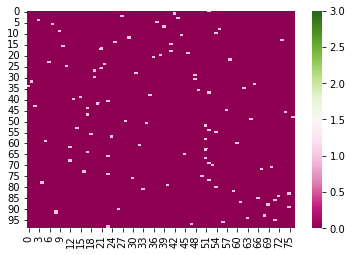

In [89]:
import seaborn as sns
sns.heatmap(vec1.toarray(),vmin=0,vmax=3,cmap="PiYG")

## Creating BOW with lemmatizatontion

In [90]:
lemma_bow = []
for i in range(len(storylines)):
  line = re.sub('[^a-zA-Z]' , ' ',storylines[i])
  line = line.lower()
  line = line.split()
  words = [lemmatizer.lemmatize(word) for word in line if word not in set(stopwords.words('english'))]
  lemma_bow += words

In [92]:
lemma_bow[:12]

['penny',
 'little',
 'girl',
 'lived',
 'alaska',
 'ice',
 'cold',
 'kept',
 'praying',
 'could',
 'play',
 'lush']

In [120]:
vec2 = cv.fit_transform(lemma_bow).toarray()
vec2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

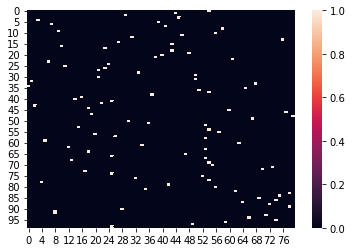

In [121]:
sns.heatmap(vec2)

In [116]:
diff = [set(stemmed_bow) | set(lemma_bow)]

In [117]:
diff

[{'abroad',
  'aeroplan',
  'aeroplane',
  'afraid',
  'alaska',
  'astonish',
  'astonished',
  'boy',
  'caught',
  'cold',
  'colder',
  'could',
  'cours',
  'course',
  'custom',
  'dare',
  'dared',
  'dark',
  'day',
  'deep',
  'edg',
  'edge',
  'enter',
  'entered',
  'eskimo',
  'even',
  'everyon',
  'everyone',
  'father',
  'fish',
  'forest',
  'friend',
  'garden',
  'get',
  'getting',
  'girl',
  'great',
  'green',
  'happen',
  'happened',
  'heard',
  'hey',
  'hide',
  'hole',
  'hous',
  'house',
  'hunt',
  'hunted',
  'ice',
  'job',
  'kept',
  'legend',
  'like',
  'littl',
  'little',
  'live',
  'lived',
  'lush',
  'magic',
  'men',
  'middl',
  'middle',
  'money',
  'near',
  'noth',
  'nothing',
  'one',
  'penni',
  'penny',
  'pick',
  'picked',
  'play',
  'playing',
  'pray',
  'praying',
  'right',
  'said',
  'seal',
  'seek',
  'shout',
  'shouted',
  'slowli',
  'slowly',
  'somewher',
  'somewhere',
  'step',
  'suck',
  'sucked',
  'take',
  '